In [1]:
import pandas as pd

In [2]:
#column names 
l=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","class"]

In [5]:
## Data Ingestions step
df=pd.read_csv("data/census_income1.csv")

In [6]:
df.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  class           32561 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.0+ MB


In [11]:
#unique value in education num
df.education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [8]:
##for search of null value
df.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

In [45]:
#converting education_num from int to object
df["education_num"]=df["education_num"].astype("str")

In [12]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [48]:
#for changing "?" in workclass to "others"
for i in range(0,len(df)):
    if df["workclass"][i]==" ?":
        df["workclass"][i]=" others"

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' others', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
#for changing "?" in occupation to "others"
for i in range(0,len(df)):
    if df["occupation"][i]==" ?":
        df["occupation"][i]=" others"

In [15]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' others',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
#for changing "?" in native_country to "others"
for i in range(0,len(df)):
    if df["native_country"][i]==" ?":
        df["native_country"][i]=" others"

In [16]:
df["class"].unique()

array([0, 1], dtype=int64)

In [ ]:
#converting <=50K to 0 in class
for i in range(0,len(df)):
    if df["class"][i]==" <=50K":
        df["class"][i]="0"

In [ ]:
#converting >50K to 1 in class
for i in range(0,len(df)):
    if df["class"][i]==" >50K":
        df["class"][i]="1"

In [81]:
#converting type of class from str to int
df["class"]=df["class"].astype("int64")

In [69]:
df["class"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
#selecting columns for numerical and categorical pipeline
numerical_cols=["age","fnlwgt","capital_gain","capital_loss","hours_per_week"]
category_cols=["workclass","education","education_num","marital_status","occupation","relationship","race","sex","native_country"]

<Axes: >

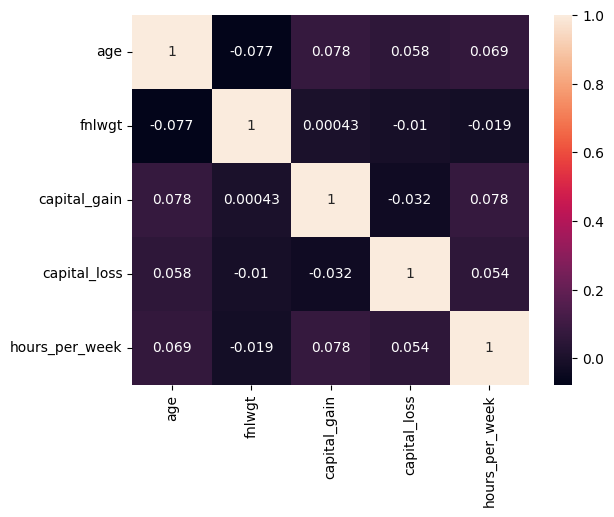

In [21]:
## correlation
import seaborn as sns
sns.heatmap(df[numerical_cols].corr(),annot=True)